In [59]:
import os

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
import seaborn as sns

from dosipy.utils.viz import fig_config, save_fig

In [68]:
# features
h = [2, 5, 10, 50, 150]
f = [6, 26, 60, 90]
A = [4, 4, 1, 1]
r = [5, 7, 10, 15]
columns=['f', 'd', 'r', 'sPDn_pln', 'sPDn_sph', 'sPDn_cyl']
color = sns.color_palette(palette='rocket', n_colors=3).as_hex()

# data
sPDn_at6GHz = np.load(os.path.join('data', 'sPDn_at6GHz.npy'))
sPDn_at26GHz = np.load(os.path.join('data', 'sPDn_at26GHz.npy'))
sPDn_at60GHz = np.load(os.path.join('data', 'sPDn_at60GHz.npy'))
sPDn_at90GHz = np.load(os.path.join('data', 'sPDn_at60GHz.npy'))

# dataset
def rpd(x, x_ref):
    """Return relative percentage difference between data and a given
    reference value."""
    return np.abs(x - x_ref) / x_ref * 100

rep = sPDn_at6GHz.shape[0]
data = np.vstack((sPDn_at6GHz, sPDn_at26GHz, sPDn_at60GHz, sPDn_at90GHz))
dataset = pd.DataFrame(np.hstack((np.repeat(f, rep).reshape(-1, 1), data)),
                       columns=columns)
dataset['rpd_sph'] = rpd(dataset['sPDn_sph'], dataset['sPDn_pln'])
dataset['rpd_cyl'] = rpd(dataset['sPDn_cyl'], dataset['sPDn_pln'])
dataset['f'] = np.asarray(dataset['f'], 'int')
dataset['d'] = np.asarray(dataset['d'] * -1000, 'int')
dataset['r'] = np.asarray(dataset['r'] * 100, dtype='int')

In [71]:
nrows = 2
ncols = 2
markerkwargs = {'lw': 2,
                #'mec': 'k',
                'mfc': 'white',
                #'mfcalt': 'white',
                'mew': 1, 'ms': 10}

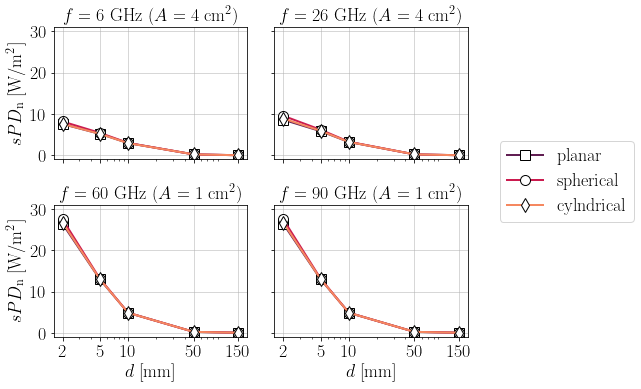

In [72]:
fig_config(latex=True, scaler=1, text_size=18, nrows=nrows, ncols=ncols)
fig = plt.figure(figsize=(7, 5.75))
axs = fig.subplots(nrows, ncols, squeeze=True, sharex=True, sharey=True)
i = 0
for ri in range(nrows):
    for ci in range(ncols):
        axs[ri, ci].plot(h, dataset[(dataset['f']==f[i]) & (dataset['r']==7)]['sPDn_pln'],
                         's-', color=color[0], label='planar', **markerkwargs)
        axs[ri, ci].plot(h, dataset[(dataset['f']==f[i]) & (dataset['r']==7)]['sPDn_sph'],
                         'o-', color=color[1], label='spherical', **markerkwargs)
        axs[ri, ci].plot(h, dataset[(dataset['f']==f[i]) & (dataset['r']==7)]['sPDn_cyl'],
                         'd-', color=color[2], label='cylndrical', **markerkwargs)
        axs[ri, ci].set(title=f'$f = {f[i]}$ GHz ($A = {A[i]}$ cm$^2$)',
                    xscale='log')
        axs[ri, ci].grid()
        if ci == 0:
            axs[ri, ci].set(ylabel='$sPD_{\\text{n}}$ [W/m$^2$]',
                            yticks=[0, 10, 20, 30])
        if ri == 1:
                axs[ri, ci].set(xlabel='$d$ [mm]',
                                xticks=h,
                                xticklabels=h,
                                ylim=[-1, 31])
        i += 1
        
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.3, 0.65))
fig.tight_layout()
# fname = os.path.join('figures', 'sPDn_abs')
# save_fig(fig, fname=fname)

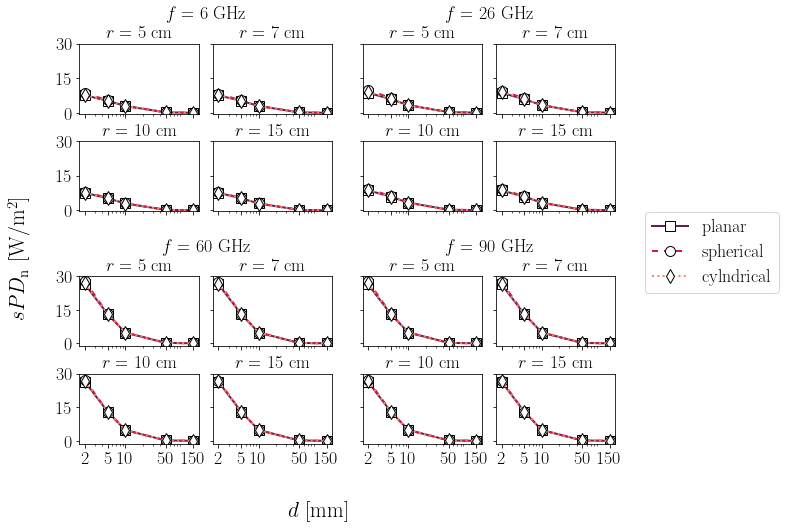

In [139]:
fig_config(latex=True, scaler=1, text_size=18)
fig = plt.figure(figsize=(9, 7.5))
gs = gridspec.GridSpec(2, 2, figure=fig)
for i, _f in enumerate(f):
    ghost = fig.add_subplot(gs[i])
    ghost.set_title(f'$f =$ {_f} GHz\n')
    ghost.axis('off')
    gs_in = gs[i].subgridspec(2, 2)
    for i_in, _r in enumerate(r):
        ax = fig.add_subplot(gs_in[i_in])
        ax.plot(h, dataset[(dataset['f']==_f) & (dataset['r']==_r)]['sPDn_pln'],
                's-', color=color[0], label='planar', **markerkwargs)
        ax.plot(h, dataset[(dataset['f']==_f) & (dataset['r']==_r)]['sPDn_sph'],
                'o--', color=color[1], label='spherical', **markerkwargs)
        ax.plot(h, dataset[(dataset['f']==_f) & (dataset['r']==_r)]['sPDn_cyl'],
                'd:', color=color[2], label='cylndrical', **markerkwargs)
        ax.set(title=f'$r =$ {_r} cm', xscale='log')
        if (_f in [60, 90]) & (_r in [10, 15]):
            ax.set(xlabel='', xticks=h, xticklabels=h)
        else:
            ax.set(xlabel='', xticks=h, xticklabels=[])
        if (_f in [6, 60]) & (_r in [5, 10]):
            ax.set(ylabel='', yticks=[0, 15, 30])
        else:
            ax.set(ylabel='', yticks=[0, 15, 30], yticklabels=[])

handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.225, 0.6))
fig.supxlabel('$d$ [mm]')
fig.supylabel('$sPD_{\\text{n}}$ [W/m$^2$]')
fig.tight_layout()

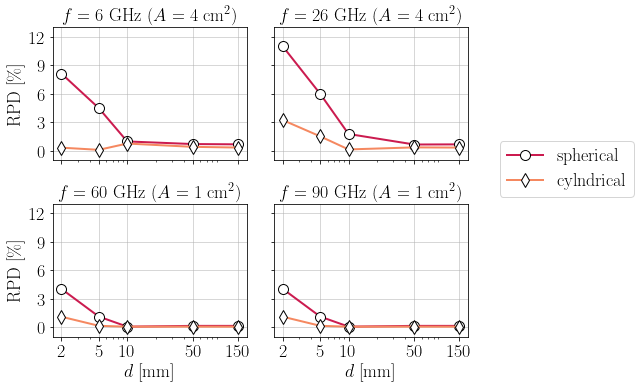

In [111]:
fig_config(latex=True, scaler=1, text_size=18, nrows=nrows, ncols=ncols)
fig = plt.figure(figsize=(7, 5.75))
axs = fig.subplots(nrows, ncols, squeeze=True, sharex=True, sharey=True)
i = 0
for ri in range(nrows):
    for ci in range(ncols):
        axs[ri, ci].plot(h, dataset[(dataset['f']==f[i]) & (dataset['r']==7)]['rpd_sph'],
                         'o-', color=color[1], label='spherical', **markerkwargs)
        axs[ri, ci].plot(h, dataset[(dataset['f']==f[i]) & (dataset['r']==7)]['rpd_cyl'],
                         'd-', color=color[2], label='cylndrical', **markerkwargs)
        axs[ri, ci].set(title=f'$f = {f[i]}$ GHz ($A = {A[i]}$ cm$^2$)',
                    xscale='log',
                    ylim=[-1, 13])
        axs[ri, ci].grid()
        if ci == 0:
            axs[ri, ci].set(ylabel='RPD [\%]',
                            yticks=[0, 3, 6, 9, 12])
        if ri == 1:
            axs[ri, ci].set(xlabel='$d$ [mm]',
                            xticks=h,
                            xticklabels=h)
        i += 1
        
handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.3, 0.65))
fig.tight_layout()
# fname = os.path.join('figures', 'sPDn_rpd')
# save_fig(fig, fname=fname)

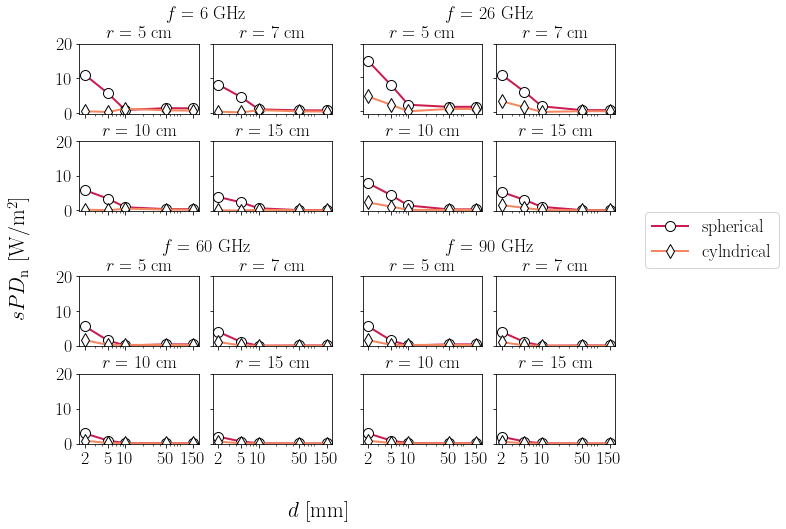

In [143]:
fig_config(latex=True, scaler=1.5, text_size=18)
fig = plt.figure(figsize=(9, 7.5))
gs = gridspec.GridSpec(2, 2, figure=fig)
for i, _f in enumerate(f):
    ghost = fig.add_subplot(gs[i])
    ghost.set_title(f'$f =$ {_f} GHz\n')
    ghost.axis('off')
    gs_in = gs[i].subgridspec(2, 2)
    for i_in, _r in enumerate(r):
        ax = fig.add_subplot(gs_in[i_in])
        ax.plot(h, dataset[(dataset['f']==_f) & (dataset['r']==_r)]['rpd_sph'],
                'o-', color=color[1], label='spherical', **markerkwargs)
        ax.plot(h, dataset[(dataset['f']==_f) & (dataset['r']==_r)]['rpd_cyl'],
                'd-', color=color[2], label='cylndrical', **markerkwargs)
        ax.set(title=f'$r =$ {_r} cm', xscale='log')
        if (_f in [60, 90]) & (_r in [10, 15]):
            ax.set(xlabel='', xticks=h, xticklabels=h)
        else:
            ax.set(xlabel='', xticks=h, xticklabels=[])
        if (_f in [6, 60]) & (_r in [5, 10]):
            ax.set(ylabel='', yticks=[0, 10, 20])
        else:
            ax.set(ylabel='', yticks=[0, 10, 20], yticklabels=[])

handles, labels = fig.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(1.225, 0.6))
fig.supxlabel('$d$ [mm]')
fig.supylabel('$sPD_{\\text{n}}$ [W/m$^2$]')
fig.tight_layout()

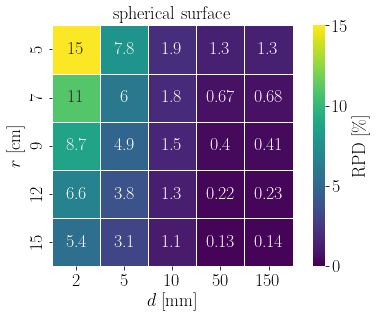

In [6]:
fig_config(latex=True, scaler=1.5, text_size=18)
fig = plt.figure()
heat = dataset[dataset['f']==26].pivot('r', 'd', 'rpd_sph')
ax = sns.heatmap(heat,
                 annot=True, linewidths=.5, cmap='viridis',
                 vmin=0, vmax=np.ceil(heat.to_numpy().max()),
                 cbar_kws={'label': 'RPD [\%]', 'ticks': [0, 5, 10, 15]},
                 square=True)
ax.set(xlabel='$d$ [mm]', ylabel='$r$ [cm]', title='spherical surface');
# fname = os.path.join('figures', 'heat_sph_rpd')
# save_fig(fig, fname=fname, formats=['png'])

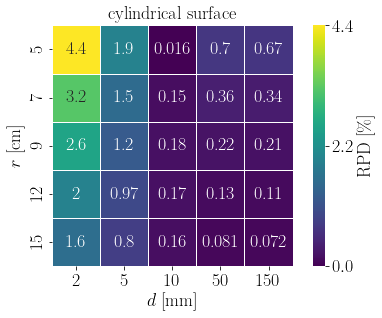

In [7]:
fig_config(latex=True, scaler=1.5, text_size=18)
fig = plt.figure()
heat = dataset[dataset['f']==26].pivot('r', 'd', 'rpd_cyl')
ax = sns.heatmap(heat,
                 annot=True, linewidths=.5, cmap='viridis',
                 vmin=0, vmax=np.round(heat.to_numpy().max(), 1),
                 cbar_kws={'label': 'RPD [\%]', 'ticks': [0, 2.2, 4.4]},
                 square=True)
ax.set(xlabel='$d$ [mm]', ylabel='$r$ [cm]', title='cylindrical surface');
# fname = os.path.join('figures', 'heat_cyl_rpd')
# save_fig(fig, fname=fname, formats=['png'])